## Import libraries <a class="anchor" id="2"></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


## Read dataset<a class="anchor" id="3"></a>

In [12]:
data=pd.read_csv(r'heart.csv')

In [13]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

## Dimension of the dataset

In [14]:
data.shape

(918, 12)

## Data Statical summary

In [15]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

## Data Summary

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Getting the categorical columns.

In [17]:
object_col =data.select_dtypes("object").columns.to_list()

## Getting the Numerical columns.

In [18]:
num_col = data.select_dtypes(include=['int64', 'float64']).columns


## The Attributess include:
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions     and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by     Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

## Correlation Matrix

In [19]:
num_data = data[num_col]
num_data.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

## Heatmap

<Axes: >

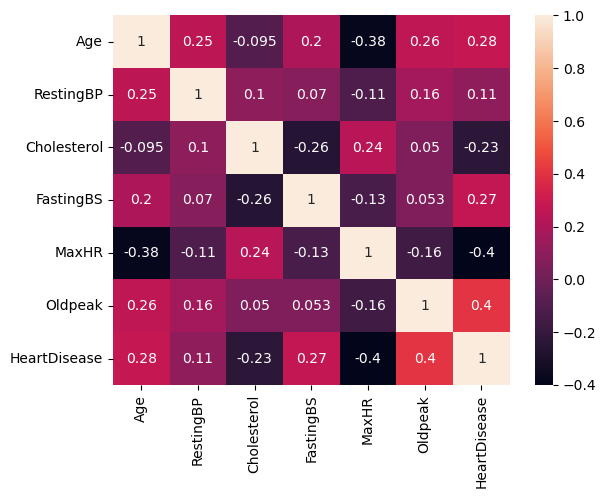

In [20]:
sns.heatmap(num_data.corr(), annot= True)

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

## Distribution of the dataset

Text(0.5, 1.0, 'Distribution of Heart Diseases')

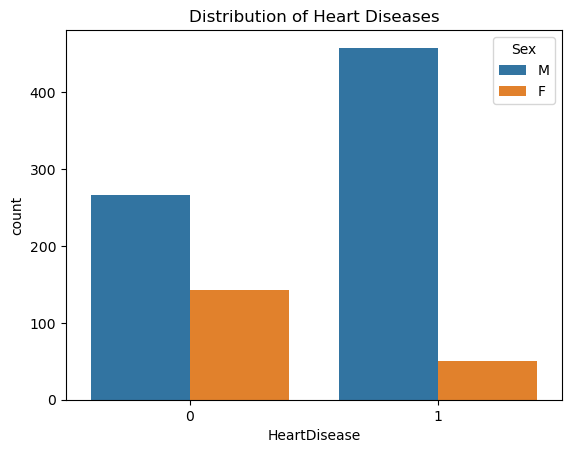

In [21]:
# Shows the Distribution of Heat Diseases with respect to male and female
sns.countplot(x='HeartDisease', hue='Sex', data=data)
plt.title("Distribution of Heart Diseases")

The dataset indicates a higher incidence of heart failure in males 

In [22]:
# Shows the Distribution of Cheast Pain with respect to male and female
import plotly.express as px

fig = px.histogram(data, x="ChestPainType", color="Sex",
                   hover_data=data.columns,
                   title="Types of Chest Pain",
                   height=500,  # Adjust height
                   width=800    # Adjust width
                  )
fig.show()

the dataset indicates a higher incidence of ChestPainType in males 

In [23]:
fig=px.histogram(data,
                 x="RestingECG",
            
                 title="Distribution of Resting ECG")
fig.show()

## Pair Plot

[]

<Figure size 1500x1000 with 0 Axes>

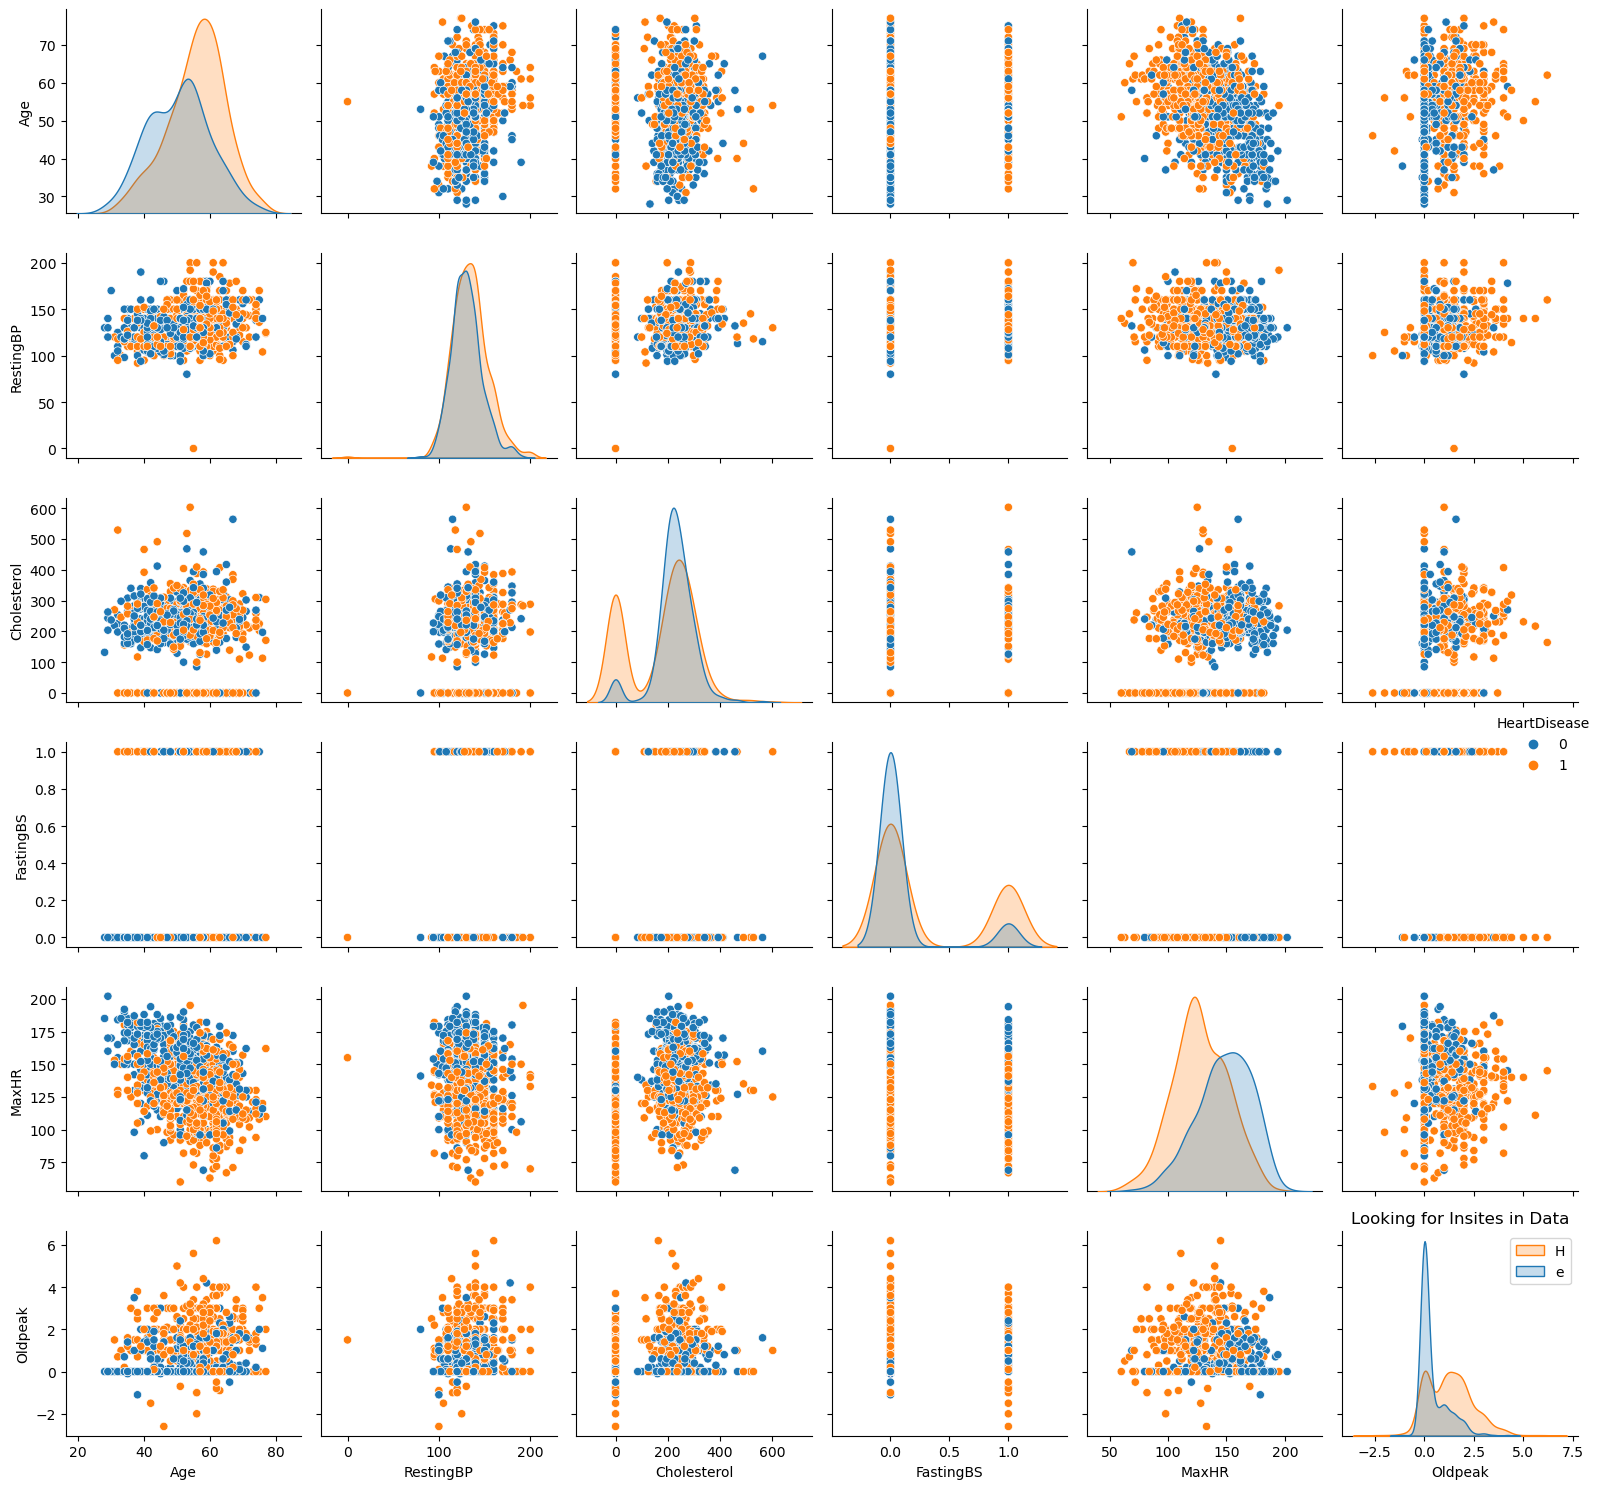

In [24]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

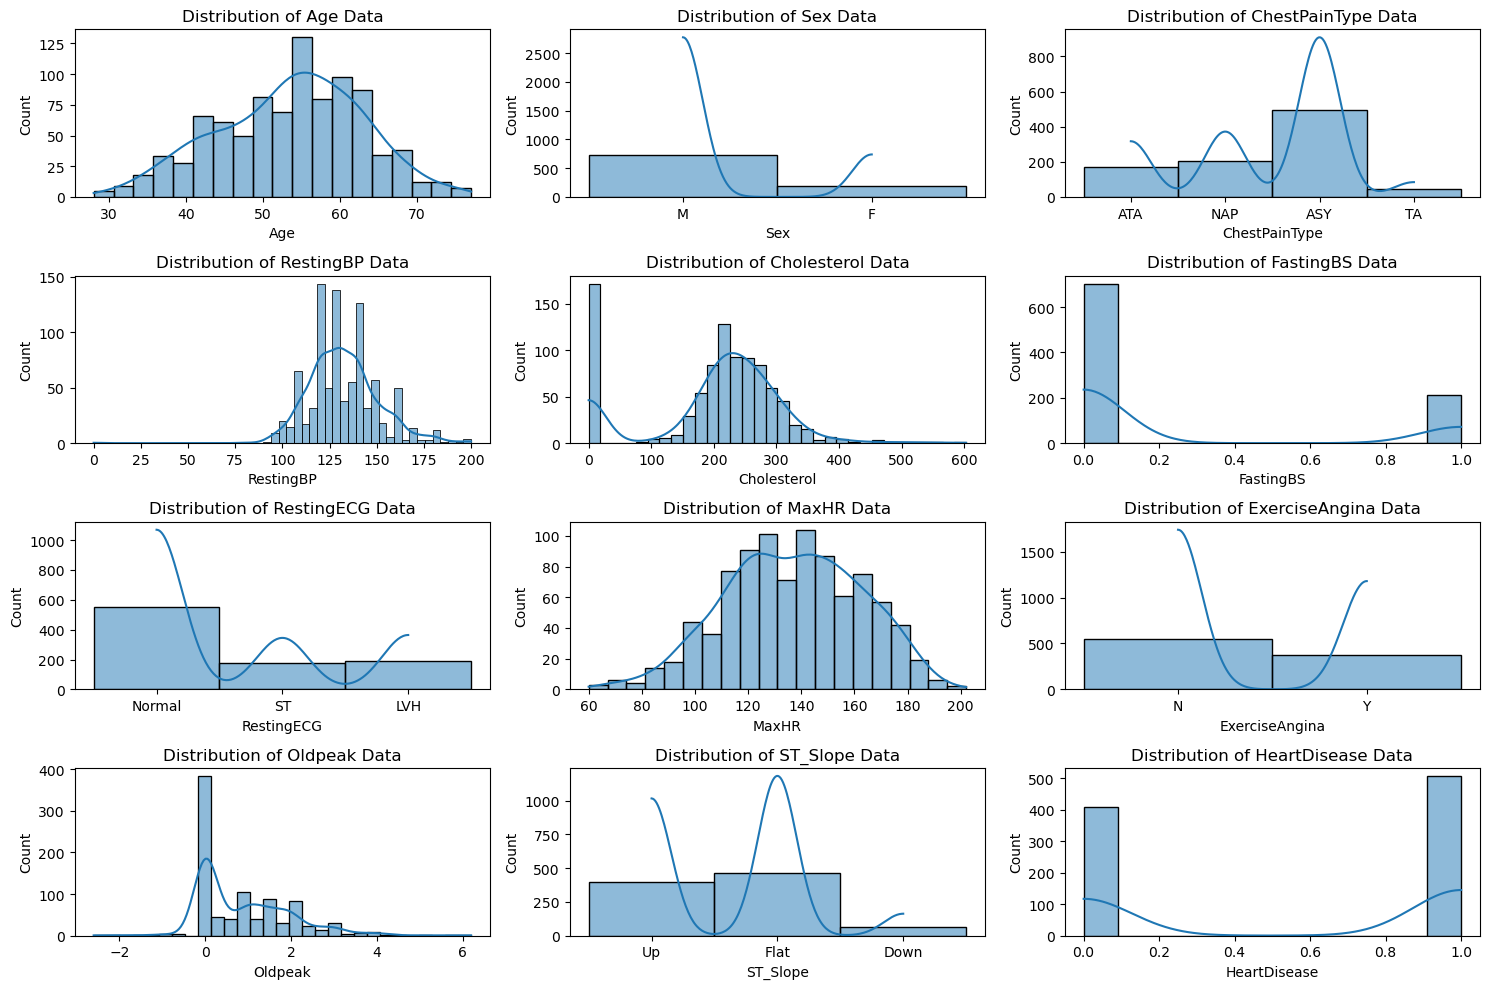

In [25]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

## Outliers

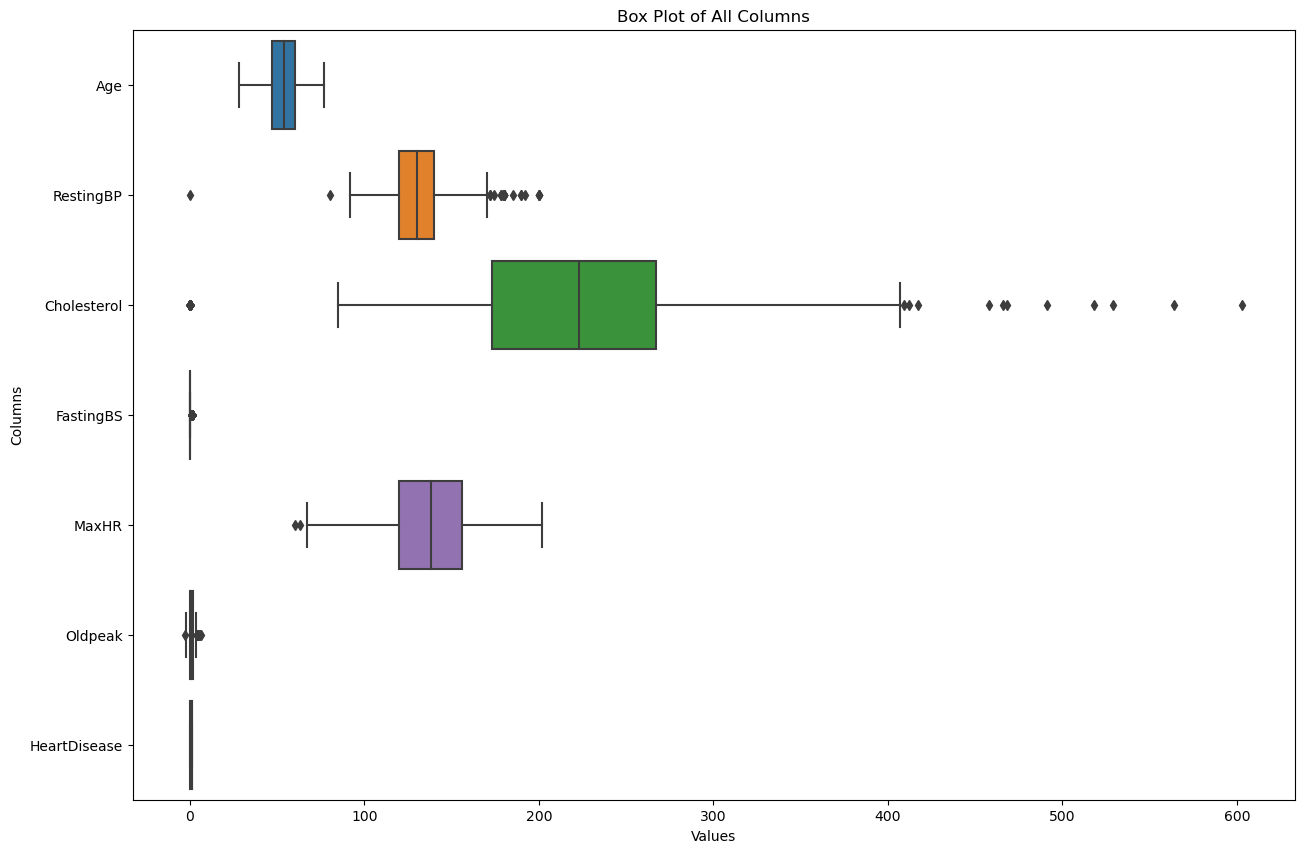

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient="h")
plt.title("Box Plot of All Columns")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()


## Data Preprocessing
1. Handling Null Values
2. Feature Scaling
3. Handling Categorical Variables
4. Duplicate values

In [27]:
data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [28]:
data.duplicated().sum()

0

**What is Normalization?¶**
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.


When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0 On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1 If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

**What is Standardization?**
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

**The Big Question – Normalize or Standardize?**
Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

**Normalization** is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

**Standardization,** on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data.

**Robust Scaler**
When working with outliers we can use Robust Scaling for scakling our data, It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. RobustScaler uses the interquartile range so that it is robust to outliers

In [29]:
for col in object_col:
    print(data[col].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [30]:
X= data.drop(columns=['HeartDisease'], axis=1)
y=data['HeartDisease']

In [31]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(X)

In [32]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
X = rb.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 527)
(184, 527)
(734,)
(184,)


## Linear Classifiers

In [35]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8695652173913043


##  Hyperparameter tuning of SVC

In [36]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 4, 'gamma': 0.05}
The best score is   : 0.8678687913521573
The test accuracy score of SVM after hyper-parameter tuning is  0.8858695652173914


##  Logistic Regression

In [37]:
# instantiating the object
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred1))

The test accuracy score of Logistric Regression is  0.8695652173913043


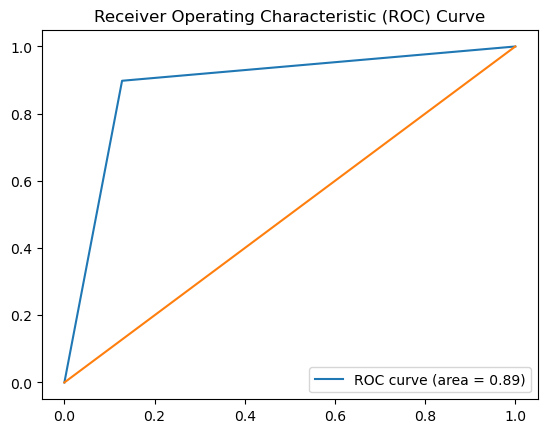

In [39]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr,  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1])


plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Decision Trees

In [40]:
 #instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.8315217391304348


## Decision Tree hyper tuning

In [41]:


# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found:", grid_search.best_params_)

# Get the best model
best_dt = grid_search.best_estimator_

# Predict values
y_pred = best_dt.predict(X_test)

# Print the test accuracy
print("The test accuracy score of the best Decision Tree Classifier is ", accuracy_score(y_test, y_pred))


Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
The test accuracy score of the best Decision Tree Classifier is  0.875


## Random forest

In [43]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.9130434782608695


## Gradiant Boosting

In [44]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.8804347826086957


## XGboost Classifier

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instantiate the XGBClassifier
xgb = XGBClassifier(n_estimators=300, max_depth=1, subsample=0.8, colsample_bytree=0.2, random_state=42)

# Fit the model
xgb.fit(X_train, y_train)

# Predict values
y_pred = xgb.predict(X_test)

# Print the test accuracy
print("The test accuracy score of XGBoost Classifier is ", accuracy_score(y_test, y_pred))


The test accuracy score of XGBoost Classifier is  0.8804347826086957


In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.5, 0.7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Instantiate the XGBClassifier
xgb = XGBClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found:", grid_search.best_params_)

# Get the best model
best_xgb = grid_search.best_estimator_

# Predict values
y_pred = best_xgb.predict(X_test)

# Print the test accuracy
print("The test accuracy score of the best XGBoost Classifier is ", accuracy_score(y_test, y_pred))


Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
The test accuracy score of the best XGBoost Classifier is  0.8913043478260869


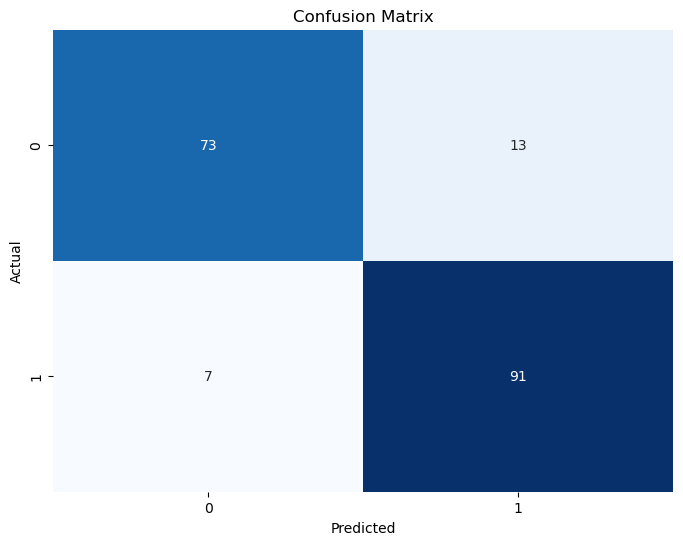

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Conclusion
* The dataset indicates a higher incidence of heart failure in males 
* the dataset indicates a higher incidence of ChestPainType in males 
* The test accuracy score of SVM is  0.8695652173913043
* The test accuracy score of SVM after hyper-parameter tuning is  0.8858695652173914
* The test accuracy score of Logistric Regression is  0.8695652173913043
* The test accuracy score of the best Decision Tree Classifier is  0.875
* The test accuracy score of Random Forest is  0.8315217391304348
* he test accuracy score of the  Gradient Boosting Classifier is  0.8804347826086957
* The test accuracy score of Gradient Boosting Classifier is  0.8804347826086957
* The test accuracy score of XGBoost Classifier is  0.8913043478260869
* The test accuracy score of after the hyper tunning XGBoost Classifier is  0.907608695652174